# Environment setup

### Library preparation

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [4]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Database ini

In [5]:
SAMPLE = 'D055B1N5'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

In [74]:
show_df(full_table)

,Ajj,Isw,N,Npar,Rn_tot,RoFF,Ro_tot,Vo_tot,dsgn,status
D053N2,40.0f,90.0n,20,2,9300,NaN,NaN,1.6m,Fin,measd
D055B1N9,40.0f,153.0p,20,2,115000,666.8M,1.0M,1.7m,Fin,fabd
D059B0N1,40.0f,3.9n,2,2,8750,1.6G,1.3k,217.8u,Fin,fabd
D059B6N3,40.0f,2.0n,20,2,84300,25.9M,78.8k,1.9m,Fin,fabd
D059BBN1,4.0p,600.0f,30,2,745000,NaN,240.0M,0.0y,x_L,fabd
D059BBN2,40.0f,320.0f,20,2,1750000,903.2M,236.7M,1.4m,Fin,fabd
D059BBN2_n,22.5f,NaN,30,2,1950000,NaN,NaN,0.0y,x_L,fabd
D059BBN8,4.0p,750.0f,30,2,1780000,NaN,50.0M,0.0y,x_L,fabd
D060B2N2,40.0f,2.7p,4,2,119000,920.9M,29.1M,318.6u,Fin,fabd
D060B2N6,40.0f,1.2p,20,2,664000,958.7M,22.9M,3.3m,Fin,fabd


In [75]:
show_df(full_table, 
         find = SAMPLE
         )

,Ajj,Isw,N,Npar,Rn_tot,RoFF,Ro_tot,Vo_tot,dsgn,status
D053N2,40.0f,90.0n,20,2,9300,NaN,NaN,1.6m,Fin,measd


# Import from origin

In [6]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


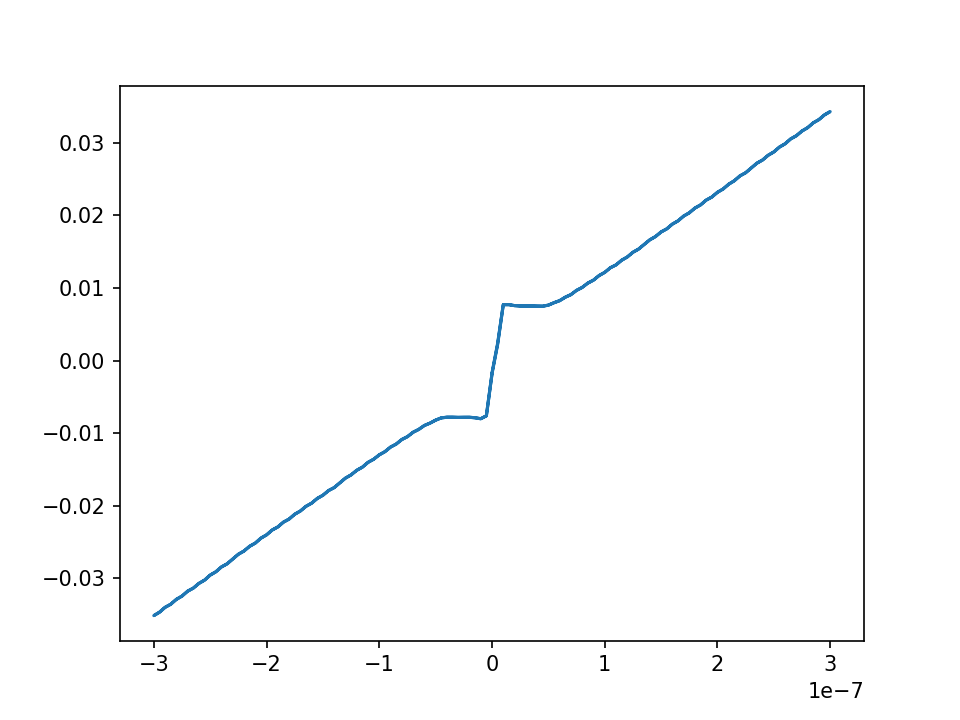

In [13]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [14]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC coarse')


Starting experimental run with id: 3


# Report

## Overview IVC

<IPython.core.display.Javascript object>


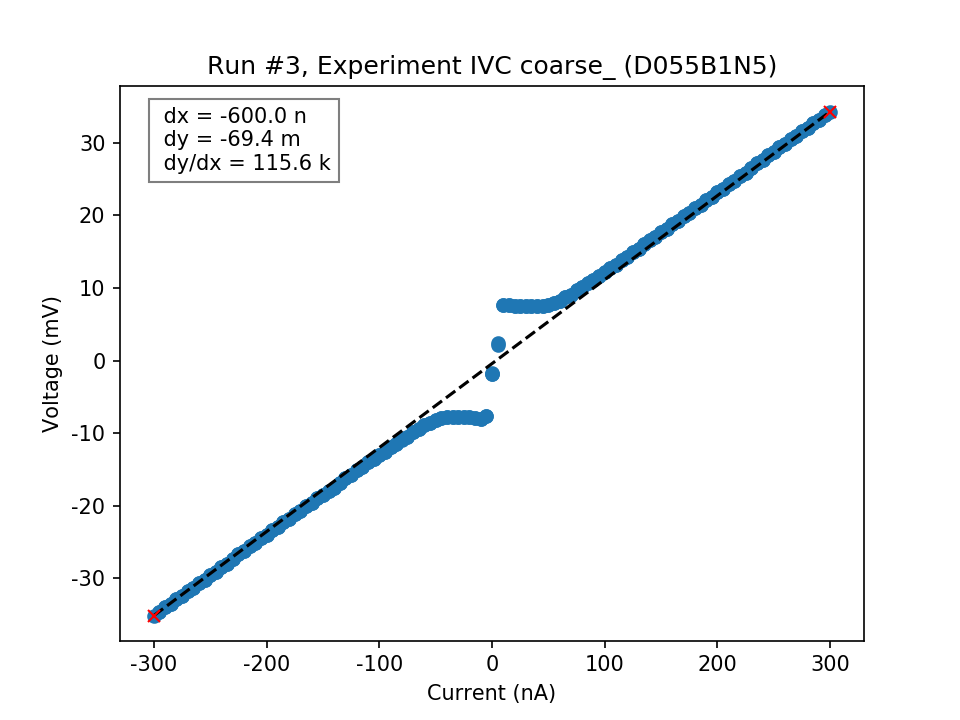

In [18]:
pbi(3, interactive = True)

In [16]:
Vg = 7.57e-3
Rn_tot = 108.7e3

## IVC fine scan

<IPython.core.display.Javascript object>


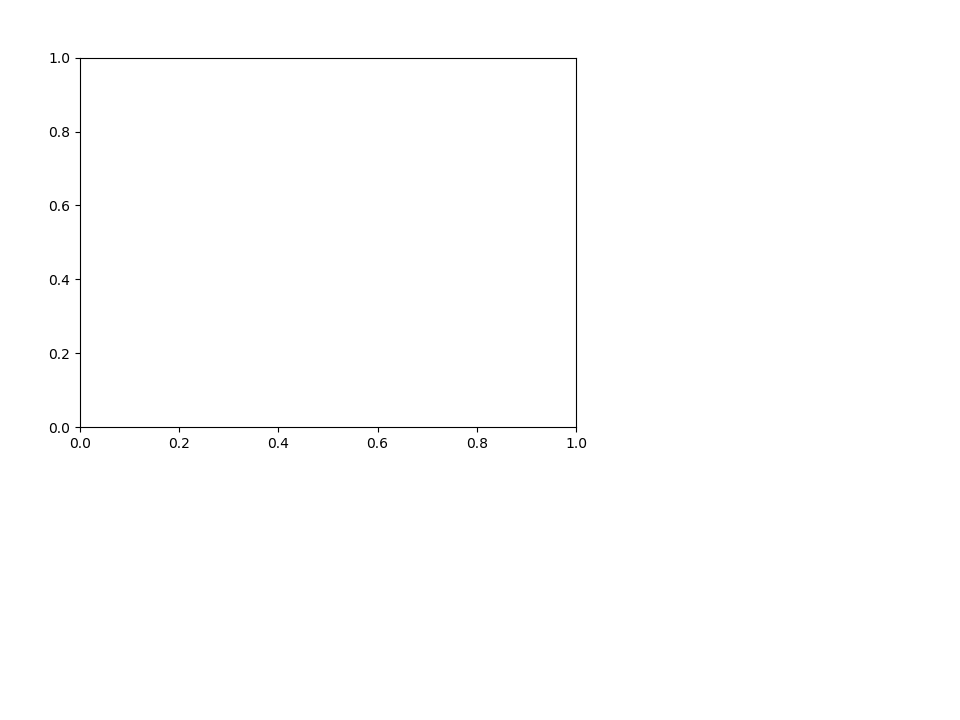

AttributeError: Unknown property ls

In [17]:
pbi(1, interactive = True)

In [19]:
Ro_tot = 1.282e6
Isw = 59e-12
N  = 30
Vo_tot = 125e-6

# Datatable update

In [20]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)

show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp


In [21]:
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055B1N5,40.0f,185.9m,1.9,78.5n,59.0p,30.0,2.0,3.6k,108.7k,42.7k,NaN,1.3M,125.0u,Fin,measd_lv,1.7


In [23]:
ft.to_excel("..\chain table.xlsx")
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)

show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055B1N5,40.0f,185.9m,1.9,78.5n,59.0p,30,2,3.6k,108700,42.7k,NaN,1.3M,125.0u,Fin,measd_lv,1.7
